In [1]:
import cv2
import numpy as np
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import pyplot as plt

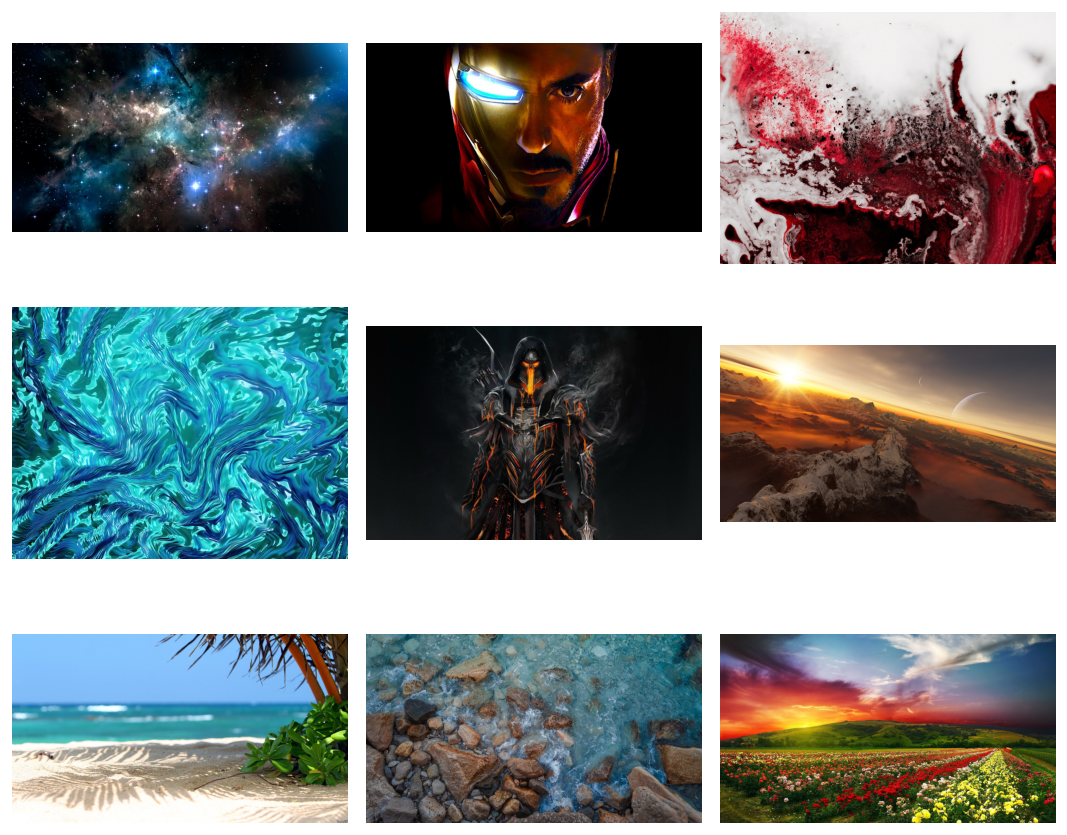

In [2]:
imgs = []
imgs_rgb = []

for i in range(1, 14):
    img = cv2.imread(f"../../Test_Images/Img_{i:>02}.jpg")
    imgs.append(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))
    imgs_rgb.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplots(3, 3, figsize = (9, 8), dpi = 120)

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(imgs_rgb[i])
    plt.axis(False)

plt.tight_layout()
plt.show()

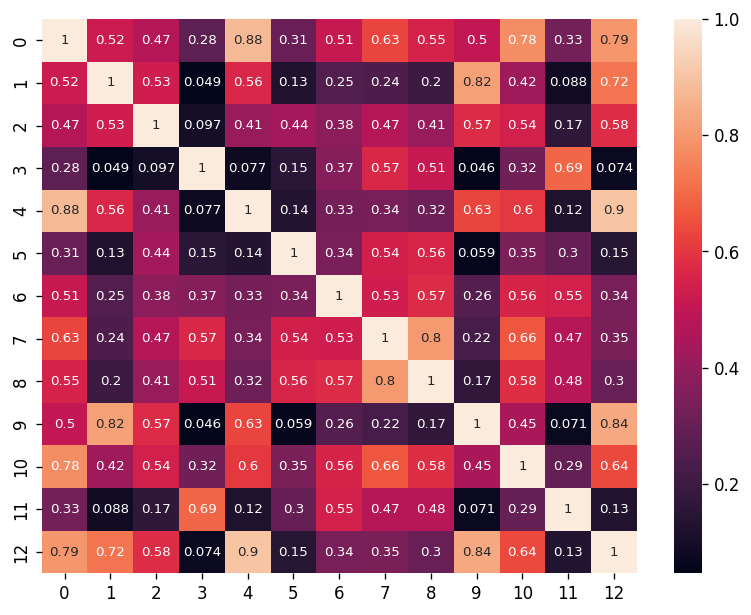

In [3]:
img_LAB_embeddings = np.zeros(shape = (len(imgs), 3 * 256))

for i, img in enumerate(imgs):
    channel_freq = np.zeros(shape = (3, 256), dtype = np.int64)
    
    for channel in range(3):
        value, freq = np.unique(img[:, :, channel], return_counts = True)
        channel_freq[channel][value] = freq

    img_LAB_embeddings[i] = channel_freq.flatten()

similarity_matrix = cosine_similarity(img_LAB_embeddings)

plt.figure(figsize = (8, 6), dpi = 120)

sns.heatmap(
    similarity_matrix, 
    annot = True, 
    annot_kws = {
        "fontsize": 8
    })
plt.show()

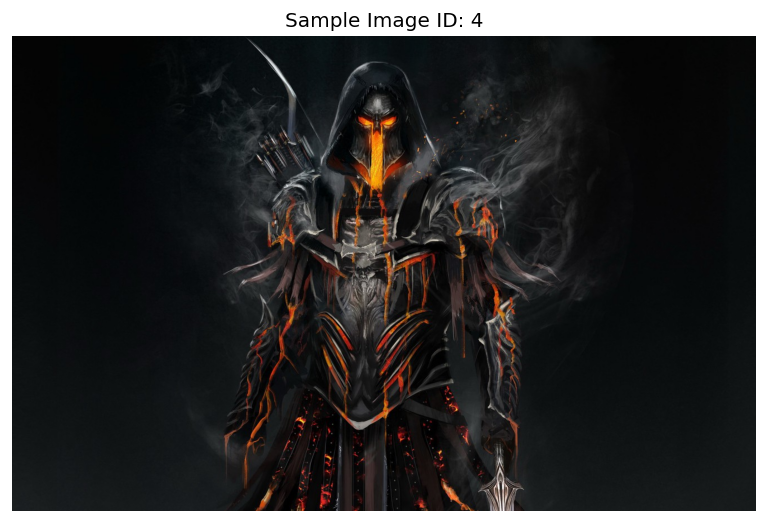

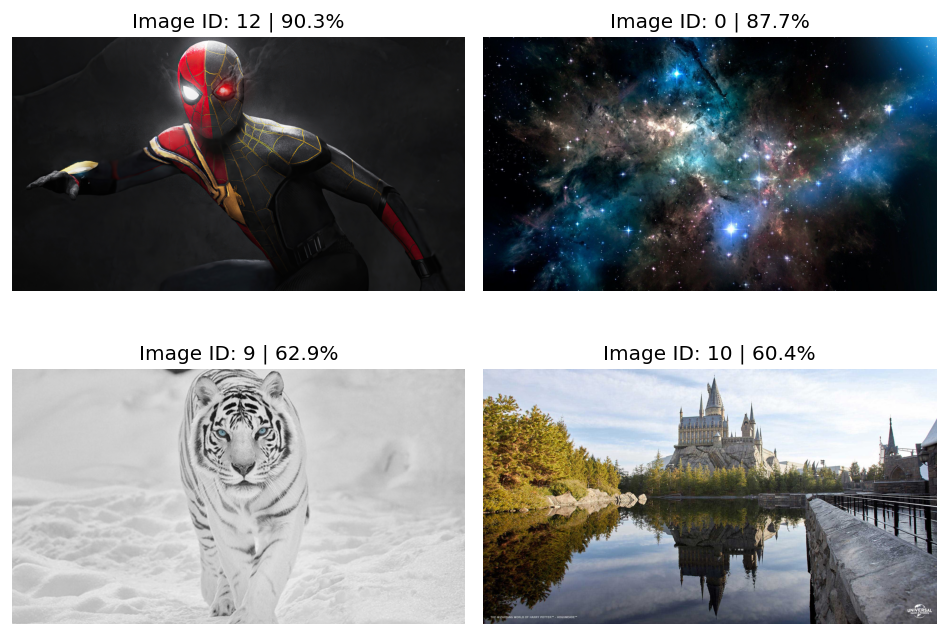

In [4]:
sample_img = np.random.randint(len(imgs))

plt.figure(figsize = (8, 6), dpi = 120)
plt.imshow(imgs_rgb[sample_img])
plt.axis(False)
plt.title(f"Sample Image ID: {sample_img}")
plt.show()

plt.subplots(2, 2, figsize = (8, 6), dpi = 120)

for i, img_id in enumerate(similarity_matrix[sample_img].argsort()[-2:-6:-1]):
    plt.subplot(2, 2, i + 1)
    plt.imshow(imgs_rgb[img_id])
    plt.title(f"Image ID: {img_id} | {similarity_matrix[sample_img][img_id]:.1%}")
    plt.axis(False)

plt.tight_layout()
plt.show()